Linear Regression Train MSE: 0.000, Linear Regression Train R2 Score: 1.000
Linear Regression Val MSE: 0.000, Linear Regression Val R2 Score: 1.000
Fitting 2 folds for each of 10 candidates, totalling 20 fits
RandomizedRandomForestRegressor Metrics:
MSE for training:  0.0
MSE for validation:  0.0
R2 score for training:  1.0
R2 score for validation:  1.0
SVM Regression Metrics:
MSE for training:  0.003450796912270291
MSE for validation:  0.0031034224014087645
R2 score for training:  0.9995981702049684
R2 score for validation:  0.999629239749647

DecisionTreeClassifier Metrics:

Epoch 1 Training Accuracy: 1.0
Epoch 1 Testing Accuracy: 1.0
Epoch 2 Training Accuracy: 1.0
Epoch 2 Testing Accuracy: 1.0
Epoch 3 Training Accuracy: 1.0
Epoch 3 Testing Accuracy: 1.0
Epoch 4 Training Accuracy: 1.0
Epoch 4 Testing Accuracy: 1.0
Epoch 5 Training Accuracy: 1.0
Epoch 5 Testing Accuracy: 1.0
Epoch 6 Training Accuracy: 1.0
Epoch 6 Testing Accuracy: 1.0
Epoch 7 Training Accuracy: 1.0
Epoch 7 Testing Acc

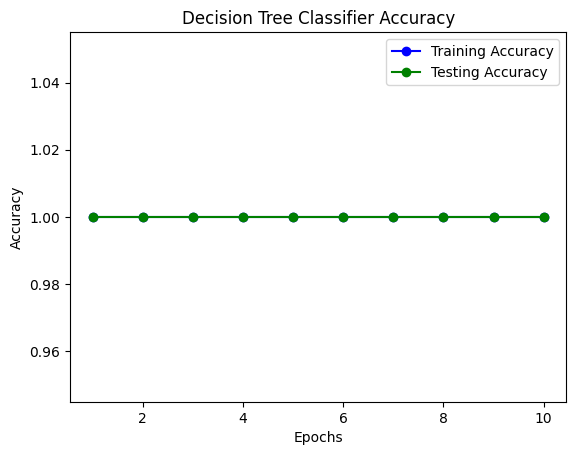

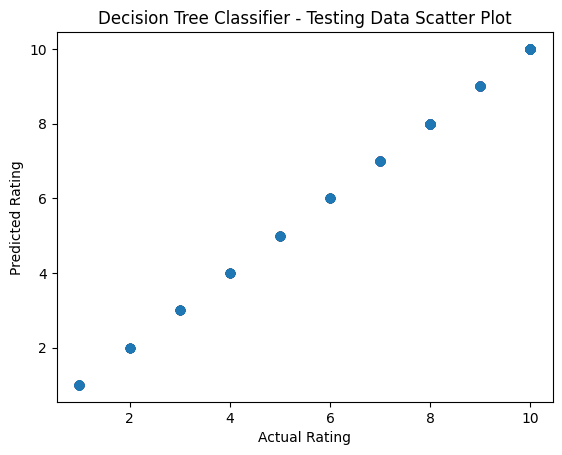

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Load your training and testing datasets using pd.read_csv
train_data = pd.read_csv('/content/drugLibTrain_raw.csv')
test_data = pd.read_csv('/content/drugLibTest_raw.csv')

# Handle missing values (you can choose a suitable strategy)
train_data = train_data.dropna()
test_data = test_data.dropna()

# Select features and target column
X = train_data[['rating', 'effectiveness', 'sideEffects']]  # Include relevant columns
y = train_data['rating']  # Assuming 'target_column' is your target variable
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_test = test_data[['rating', 'effectiveness', 'sideEffects']]  # Include relevant columns
y_test = test_data['rating']  # Assuming 'target_column' is your target variable

# Encode categorical variables with OrdinalEncoder
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)
X_test_encoded = encoder.transform(X_test)

# Linear Regression
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(X_train_encoded, y_train)
y_train_pred_reg = regression_model.predict(X_train_encoded)
y_val_pred_reg = regression_model.predict(X_val_encoded)
train_mse = mean_squared_error(y_train, y_train_pred_reg)
train_r2 = r2_score(y_train, y_train_pred_reg)
val_mse = mean_squared_error(y_val, y_val_pred_reg)
val_r2 = r2_score(y_val, y_val_pred_reg)
print(f'Linear Regression Train MSE: {train_mse:.3f}, Linear Regression Train R2 Score: {train_r2:.3f}')
print(f'Linear Regression Val MSE: {val_mse:.3f}, Linear Regression Val R2 Score: {val_r2:.3f}')

# Randomized Random Forest Regression
param = [
    {
        "n_estimators": [100, 200, 300],
        "max_depth": [3, 4, 6],
        "max_leaf_nodes": [15, 20, 25],
    },
]

from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestRegressor()
rs_rf = RandomizedSearchCV(rf, param, cv=2, n_jobs=-1, verbose=1)
rs_rf.fit(X_train_encoded, y_train)
rs_rf_train = rs_rf.predict(X_train_encoded)
rs_rf_val = rs_rf.predict(X_val_encoded)

print("RandomizedRandomForestRegressor Metrics:")
print("MSE for training: ", mean_squared_error(y_train, rs_rf_train))
print("MSE for validation: ", mean_squared_error(y_val, rs_rf_val))
print("R2 score for training: ", r2_score(y_train, rs_rf_train))
print("R2 score for validation: ", r2_score(y_val, rs_rf_val))

# SVR
svm_model = SVR()
svm_model.fit(X_train_encoded, y_train)
svm_train = svm_model.predict(X_train_encoded)
svm_val = svm_model.predict(X_val_encoded)

print("SVM Regression Metrics:")
print("MSE for training: ", mean_squared_error(y_train, svm_train))
print("MSE for validation: ", mean_squared_error(y_val, svm_val))
print("R2 score for training: ", r2_score(y_train, svm_train))
print("R2 score for validation: ", r2_score(y_val, svm_val))

# Decision Tree Classifier
from sklearn.metrics import accuracy_score
dt = DecisionTreeClassifier(criterion="entropy", max_depth=5)
train_acc = []
test_acc = []
print("\nDecisionTreeClassifier Metrics:\n")
for i in range(1, 11):
    dt.fit(X_train_encoded, y_train)
    train_pred = dt.predict(X_train_encoded)
    test_pred = dt.predict(X_test_encoded)
    train_acc.append(accuracy_score(train_pred, y_train))
    test_acc.append(accuracy_score(test_pred, y_test))
    print(f"Epoch {i} Training Accuracy: {train_acc[-1]}")
    print(f"Epoch {i} Testing Accuracy: {test_acc[-1]}")

# Plotting accuracy vs epoch
epochs = range(1, 11)
plt.plot(epochs, train_acc, "bo-", label="Training Accuracy")
plt.plot(epochs, test_acc, "go-", label="Testing Accuracy")
plt.title("Decision Tree Classifier Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Plotting the scatter plot of actual vs predicted values
plt.scatter(y_test, test_pred, alpha=0.3)
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.title("Decision Tree Classifier - Testing Data Scatter Plot")
plt.show()